# $$Introduction$$

## To Predict the Strength of Concrete
### 1. Context:
Concrete is the most important material in civil engineering. The concrete compressive strength is a highly nonlinear function of age and ingredients. These ingredients include cement, blast furnace slag, fly ash, water, superplasticizer, coarse aggregate, and fine aggregate.
### 2. Objective
Modeling of strength of high performance concrete using Machine Learning

### 3. Data Description:
The actual concrete compressive strength (MPa) for a given mixture under a specific age (days) was determined from laboratory. Data is in raw form (not scaled).The data has **8 quantitative** input variables, and **1 quantitative** output variable, and **1030 instances (observations)**.

######  Concrete compressive strength: 
The compressive strength of a concrete is defined as the ability of the concrete to withstand specific compressive forces.
# $$  Strength = \frac{Force}{Area} $$

### Attribute information

- Cement (component 1) -- quantitative -- kg in a m3 mixture -- Input Variable


- Blast Furnace Slag (component 2) -- quantitative -- kg in a m3 mixture -- Input Variable


- Fly Ash (component 3) -- quantitative -- kg in a m3 mixture -- Input Variable


- Water (component 4) -- quantitative -- kg in a m3 mixture -- Input Variable


- Superplasticizer (component 5) -- quantitative -- kg in a m3 mixture -- Input Variable


- Coarse Aggregate (component 6) -- quantitative -- kg in a m3 mixture -- Input Variable


- Fine Aggregate (component 7) -- quantitative -- kg in a m3 mixture -- Input Variable


- Age -- quantitative -- Day (1~365) -- Input Variable


- Concrete compressive strength -- quantitative -- MPa(megapascals) -- Output Variable

<h2 style="color:blue" align="left"> 1. Import necessary Libraries </h2>

In [5]:
# Read Data
import numpy as np     # Linear Algebra (calculate the mean and standard deviation)
import pandas as pd    # manipulate data, data processing, load csv file I/O (e.g. pd.read_csv)

# Visualization
import seaborn as sns                  # Visualization using seaborn
import matplotlib.pyplot as plt        # Visualization using matplotlib
%matplotlib inline
import plotly                          # Visualization using Plotly
import plotly.express as px
import plotly.graph_objs as go

# style
plt.style.use("fivethirtyeight")       # Set Graphs Background style using matplotlib
sns.set_style("darkgrid")              # Set Graphs Background style using seaborn

# ML model building; Pre Processing & Evaluation
from sklearn.model_selection import train_test_split                     # split  data into training and testing sets
from sklearn.linear_model import LinearRegression, Lasso, Ridge          # Linear Regression, Lasso and Ridge
from sklearn.tree import DecisionTreeRegressor                           # Decision tree Regression
from sklearn.ensemble import RandomForestRegressor                       # this will make a Random Forest Regression
from sklearn import svm                                                  # this will make a SVM classificaiton
from sklearn.svm import SVC                                              # import SVC from SVM
import xgboost as xgb
from xgboost import XGBRegressor
from sklearn.metrics import confusion_matrix, classification_report      # this creates a confusion matrix
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.metrics import roc_curve,auc                                # ROC
from sklearn.preprocessing import StandardScaler                         # Standard Scalar
from sklearn.model_selection import GridSearchCV                         # this will do cross validation
from sklearn.decomposition import PCA                                    # to perform PCA to plot the data

import warnings                                                          # Ignore Warnings
warnings.filterwarnings("ignore")

<h2 style="color:blue" align="left"> 2. Load data </h2>

In [6]:
# Import first 5 rows
df = pd.read_csv("concrete.csv")
df.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [3]:
# checking dimension (num of rows and columns) of dataset
df.shape

(1030, 9)

#### Checking for Numerical and Categorical features

In [4]:
# check dataframe structure like columns and its counts, datatypes & Null Values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cement        1030 non-null   float64
 1   slag          1030 non-null   float64
 2   ash           1030 non-null   float64
 3   water         1030 non-null   float64
 4   superplastic  1030 non-null   float64
 5   coarseagg     1030 non-null   float64
 6   fineagg       1030 non-null   float64
 7   age           1030 non-null   int64  
 8   strength      1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


In [5]:
# check the datatypes
df.dtypes

cement          float64
slag            float64
ash             float64
water           float64
superplastic    float64
coarseagg       float64
fineagg         float64
age               int64
strength        float64
dtype: object

- Observed that **there is no categorical features** in this dataset. Only have **numerical features of int64 & float64**.

In [6]:
# Gives number of data points in each variable
df.count()

cement          1030
slag            1030
ash             1030
water           1030
superplastic    1030
coarseagg       1030
fineagg         1030
age             1030
strength        1030
dtype: int64

<h2 style="color:blue" align="left"> 3. EDA (Exploratory Data Analysis) </h2>

- EDA is a way of **Visualizing, Summarizing and interpreting** the information that is **hidden in rows and column** format.

- Find Unwanted Columns
- Find Missing Values
- Find Features with one value
- Explore the Categorical Features
- Find Categorical Feature Distribution
- Relationship between Categorical Features and Label
- Explore the Numerical Features
- Find Discrete Numerical Features
- Relation between Discrete numerical Features and Labels
- Find Continous Numerical Features
- Distribution of Continous Numerical Features
- Relation between Continous numerical Features and Labels
- Find Outliers in numerical features
- Explore the Correlation between numerical features

### 1. Find Unwanted Columns

- There is no unwanted column present in given dataset to remove.

     EX: ID, S.No etc

### 2. Find Missing Values

#### Mising Value Checking
- I use five function for mising value checking
   - insull()
      - If any value is null return True
      - Otherewise return False
      
   - isnull().any()
      - If any columns have null value return True
      - Otherewise return False
      
   - isnull().sum()
      - If any columns have null value return how many null values have
      - If no null value present return 0
      
   - missingno()
      - Showing values by bar graph
      
   - Heatmap()
      - Showing values by graph

In [7]:
# isnull() check null value
df.isnull()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
1025,False,False,False,False,False,False,False,False,False
1026,False,False,False,False,False,False,False,False,False
1027,False,False,False,False,False,False,False,False,False
1028,False,False,False,False,False,False,False,False,False


In [8]:
# Listing Number of missing values by feature column wise.
df.isnull().sum()

cement          0
slag            0
ash             0
water           0
superplastic    0
coarseagg       0
fineagg         0
age             0
strength        0
dtype: int64

- All **features** returned as **"No Null Values".**

In [9]:
# any() check null values by columns
df.isnull().any()

cement          False
slag            False
ash             False
water           False
superplastic    False
coarseagg       False
fineagg         False
age             False
strength        False
dtype: bool

- It shows all columns as False means no NULL Values present in dataset.

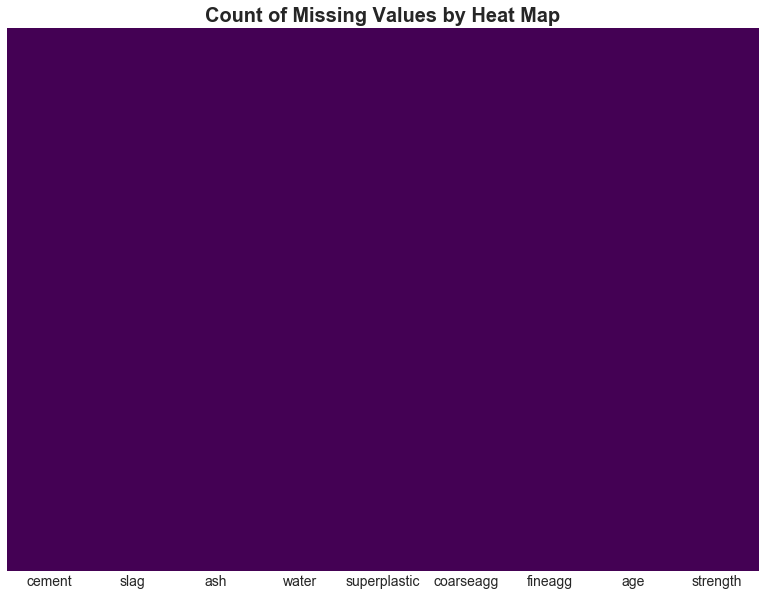

In [10]:
# Missing value representation by Heatmap
plt.figure(figsize=(12,10))
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')
plt.xticks(fontsize=14)
plt.title('Count of Missing Values by Heat Map', fontsize=20, fontweight = 'bold')
plt.show()

- From graph understood that there is **no missing values** in this dataset.

### 3. Find Features with one value

In [11]:
for column in df.columns:
    print(column,df[column].nunique())

cement 278
slag 185
ash 156
water 195
superplastic 111
coarseagg 284
fineagg 302
age 14
strength 845


- All columns have **more than 1 unique value.** No feature found with one value.


- There could be chance of only one category in a particular feature. In Categorical features, suppose gender column we have only one value ie male.Then there is no use of that feature in dataset. 

### 4. Explore the Categorical Features

In [12]:
categorical_features = [feature for feature in df.columns if df[feature].dtypes=='O']
categorical_features

[]

- There is no categorical features in this dataset.

In [13]:
for feature in categorical_features:
    print('The feature is {} and number of categories are {}'.format(feature,len(df[feature].unique())))

- Steps **5 to 7 not required** since there is **no categorical features**.

### 8. Explore the Numerical Features

In [14]:
numerical_features = df.select_dtypes(exclude='object')
numerical_features

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.18
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.70
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.77


### 9. Find Discrete Numerical Features

In [15]:
discrete_feature = [feature for feature in numerical_features if len(df[feature].unique())<25]
print("Discrete Variables Count: {}".format(len(discrete_feature)))

Discrete Variables Count: 1


### 10. Find Continous Numerical Features

In [16]:
continuous_features = [feature for feature in numerical_features if feature not in discrete_feature+['strength']]
print("Continuous feature Count {}".format(len(continuous_features)))

Continuous feature Count 7


In [17]:
continuous_features

['cement', 'slag', 'ash', 'water', 'superplastic', 'coarseagg', 'fineagg']

### 11. Distribution of Continous Numerical Features (Ingredients)

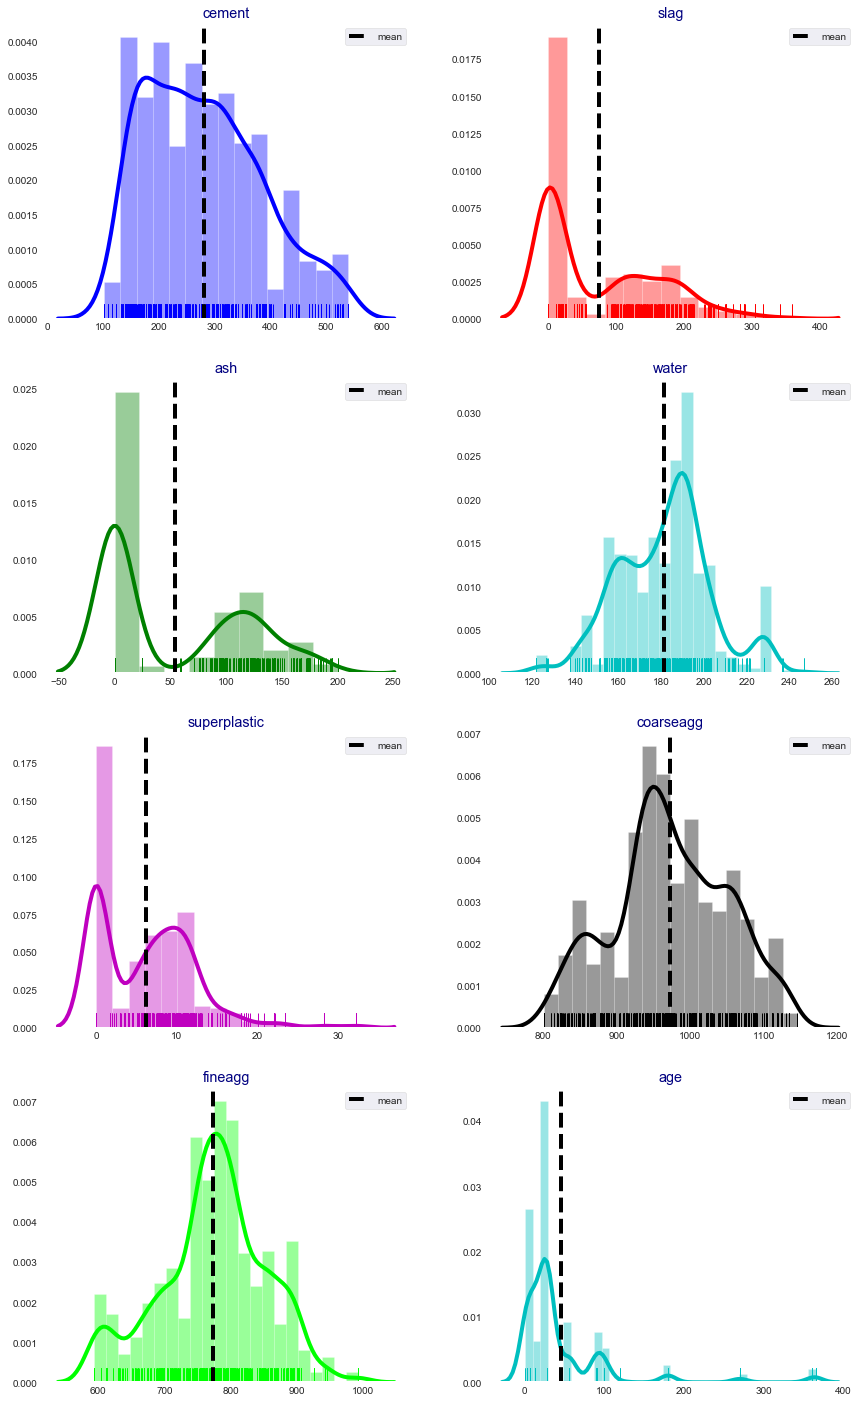

In [19]:
# plot a univariate distribution of continues observations
import itertools
columns = [i for i in df.columns if i not in 'compressive_strength']
length = len(columns)
cs = ["b","r","g","c","m","k","lime","c"]

fig = plt.figure(figsize=(13,25))

for i,j,k in itertools.zip_longest(columns, range(length),cs):
    plt.subplot(4,2,j+1)
    ax = sns.distplot(df[i], color=k, rug=True)
    ax.set_facecolor("w")
    plt.axvline(df[i].mean(), linestyle="dashed", label="mean", color="k")
    plt.legend(loc="best")
    plt.title(i,color="navy")
    plt.xlabel("")

- it seems all continuous features are not normally distributed


- **cement, slag, ash & superplastic** are **right skewed**


- **water, fineagg, coarseagg** is **left skewed**.

### Compressive strength distribution

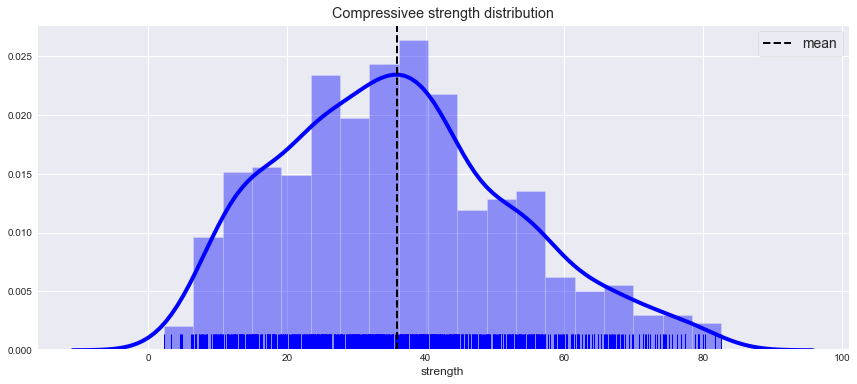

In [23]:
plt.figure(figsize=(13,6))
sns.distplot(df["strength"], color="b", rug=True)
plt.axvline(df["strength"].mean(), linestyle="dashed", color="k", label='mean', linewidth=2)
plt.legend(loc="best", prop={"size":14})
plt.title("Compressivee strength distribution")
plt.show()

### 12. Relation between Continous numerical Features and Labels

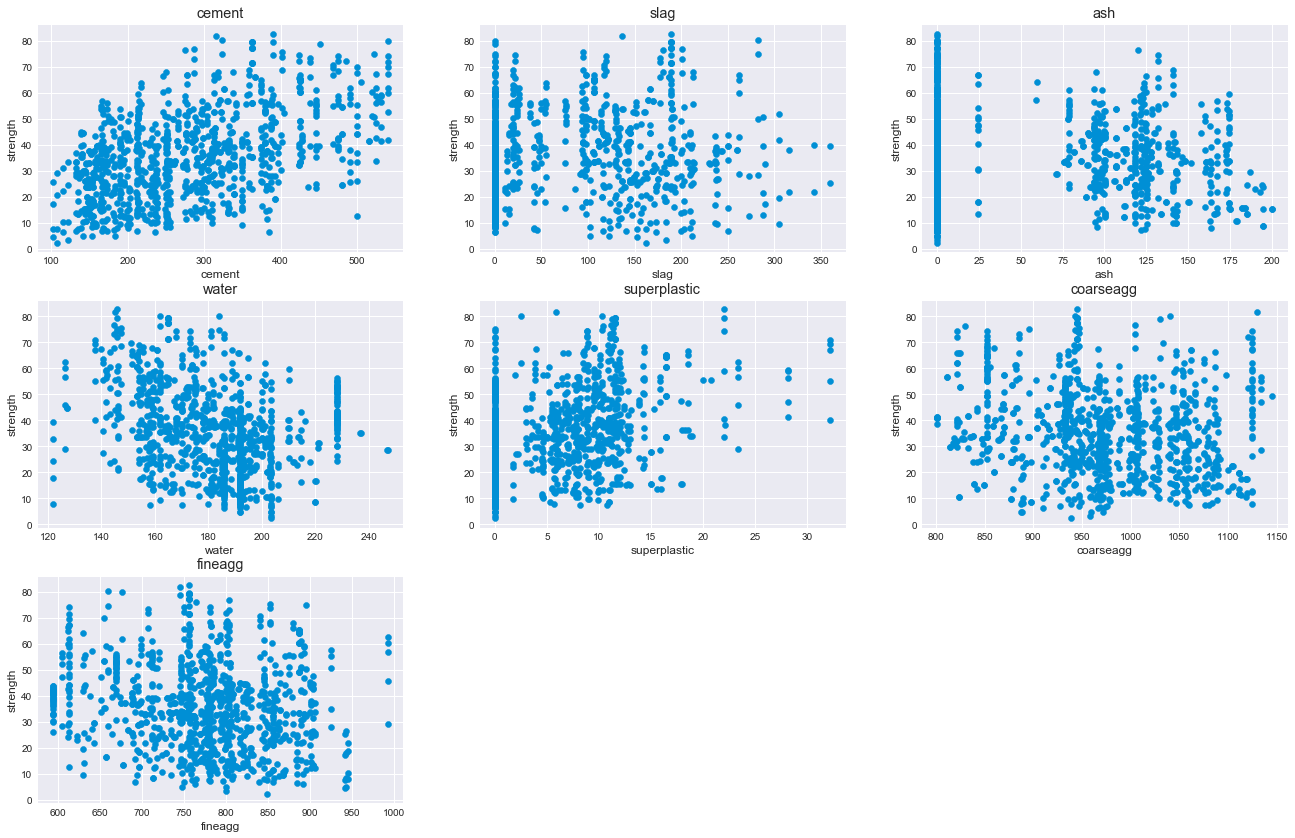

In [20]:
plt.figure(figsize=(20,60), facecolor='white')
plotnumber =1
for feature in continuous_features:
    data=df.copy()
    ax = plt.subplot(12,3,plotnumber)
    plt.scatter(df[feature],df['strength'])
    plt.xlabel(feature)
    plt.ylabel('strength')
    plt.title(feature)
    plotnumber+=1
plt.show()

### 13. Find Outliers in numerical features

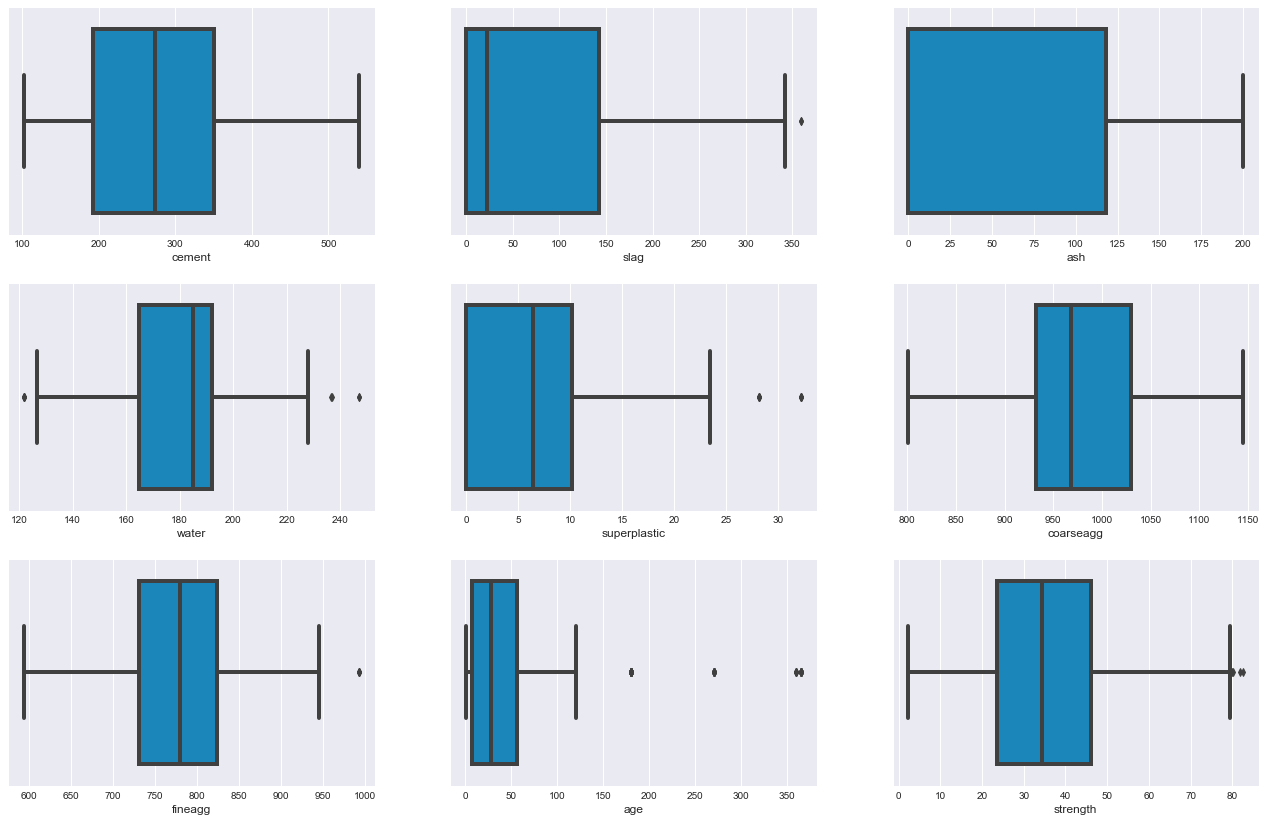

In [21]:
# boxplot on numerical features to find outliers
plt.figure(figsize=(20,60), facecolor='white')
plotnumber =1
for numerical_feature in numerical_features:
    ax = plt.subplot(12,3,plotnumber)
    sns.boxplot(df[numerical_feature])
    plt.xlabel(numerical_feature)
    plotnumber+=1
plt.show()

#### Observations
- **Age** column appears to be having **maximum number of outliers**
- Feature **Slag, Water, superplastic & fineagg** have some **outlier** but are **not extreme** so we need not to treat them.

### 14. Explore the Correlation between numerical features

In [24]:
## Checking for correlation
df.corr()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
cement,1.000000,-0.275216,-0.397467,-0.081587,0.092386,-0.109349,-0.222718,0.081946,0.497832
slag,-0.275216,1.000000,-0.323580,0.107252,0.043270,-0.283999,-0.281603,-0.044246,0.134829
ash,-0.397467,-0.323580,1.000000,-0.256984,0.377503,-0.009961,0.079108,-0.154371,-0.105755
water,-0.081587,0.107252,-0.256984,1.000000,-0.657533,-0.182294,-0.450661,0.277618,-0.289633
superplastic,0.092386,0.043270,0.377503,-0.657533,1.000000,-0.265999,0.222691,-0.192700,0.366079
coarseagg,-0.109349,-0.283999,-0.009961,-0.182294,-0.265999,1.000000,-0.178481,-0.003016,-0.164935
fineagg,-0.222718,-0.281603,0.079108,-0.450661,0.222691,-0.178481,1.000000,-0.156095,-0.167241
age,0.081946,-0.044246,-0.154371,0.277618,-0.192700,-0.003016,-0.156095,1.000000,0.328873
strength,0.497832,0.134829,-0.105755,-0.289633,0.366079,-0.164935,-0.167241,0.328873,1.000000


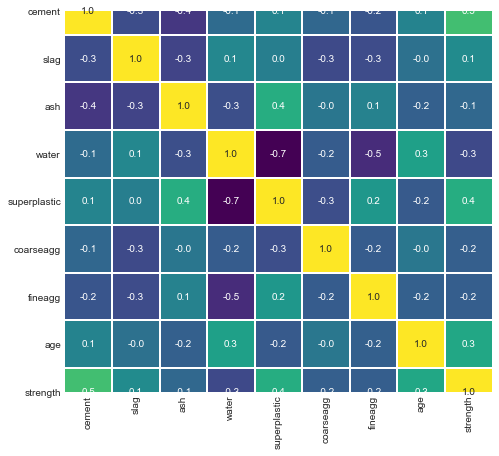

In [25]:
## Checking for correlation
cor_mat=df.corr()
fig = plt.figure(figsize=(15,7))
sns.heatmap(cor_mat, annot=True, cbar=False, cmap='viridis', fmt='.1f', linewidth=1, square=True)
plt.show()

- Cement, Superplastic & age is highly correlated with dependent variable.
- water is highly correlated with superplastic.
- As we know the perfect ratio of water & cement gives concrete the desired strength.

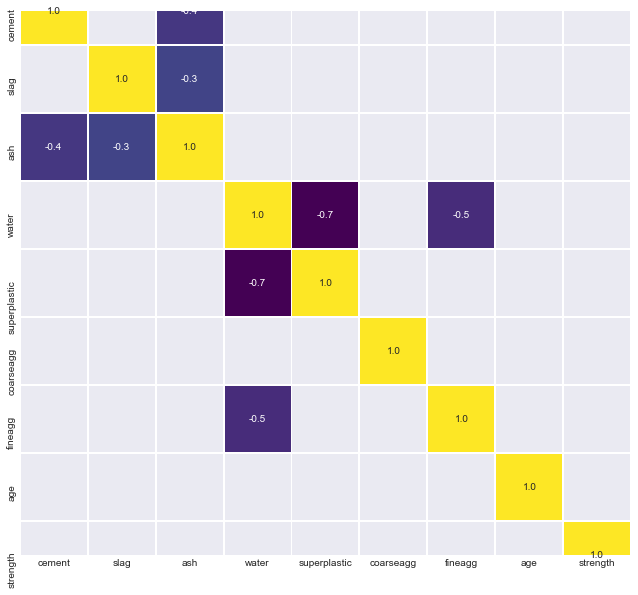

In [26]:
# highlight only features have correlation between 0.5 and -0.3
plt.figure(figsize=(12,10))
corr = df.corr()
sns.heatmap(corr[(corr >= 0.5) | (corr <= -0.3)], annot=True, cbar=False,
                                 cmap='viridis', linewidth=1, fmt='.1f', square=True)

### 15. Descriptive statistics

In [27]:
# descriptive statistics (numerical columns)
df.describe()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


- for **each feature** it provides below:


     1. count       --->  total no of data points
     2. statistics  --->  mean, standard deviation
     3. min & max   --->  values of feature
     4. percentile  --->  25%, 50%, 75%

<h2 style="color:green" align="left"> 5. Data Visualization </h2>

- Used below **visualisation libraries**


     1. Matplotlib
     2. Seaborn (statistical data visualization)

### 1. Categorical

- Categorical data :


     1. Numerical Summaries
     2. Histograms
     3. Pie Charts
     

### 2. Univariate Analysis

- Univariate Analysis : data consists of **only one variable (only x value)**.


     1. Line Plots / Bar Charts
     2. Histograms
     3. Box Plots 
     4. Count Plots
     5. Descriptive Statistics techniques
     6. Violin Plot

### 1. Univariate Analysis

### a. Histrogram

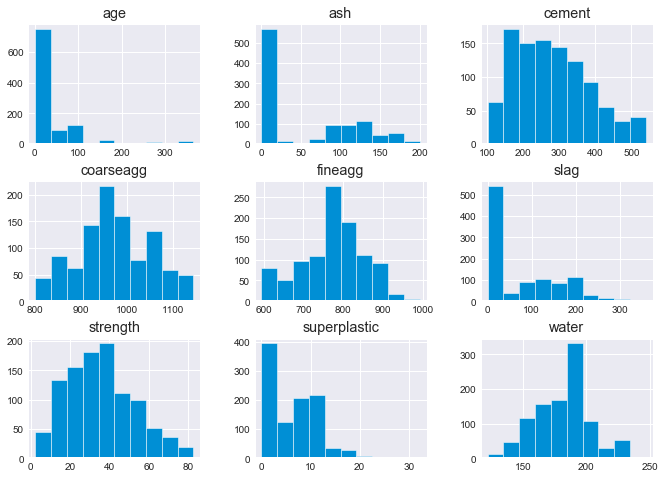

In [32]:
# Histrogram
df.hist(figsize = (10,8))
plt.show()

Text(0, 0.5, 'Y-Axis')

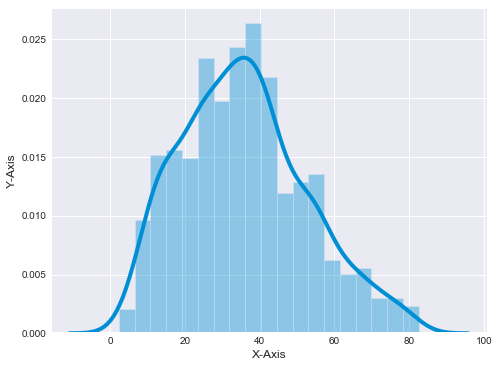

In [41]:
plt.figure(figsize=(7,6))
sns.distplot(df.strength, kde=True)
plt.xlabel('X-Axis')
plt.ylabel('Y-Axis')

- Target variable 'strength' is right skewed and imbalanced data.

### b. Count Plot

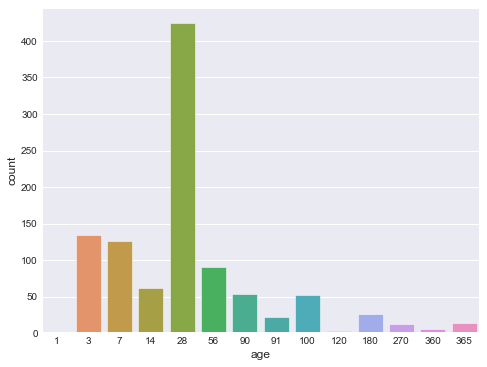

In [42]:
plt.figure(figsize=(7,6))
sns.countplot('age', data=df)

### c. Box Plot
- to find out outliers

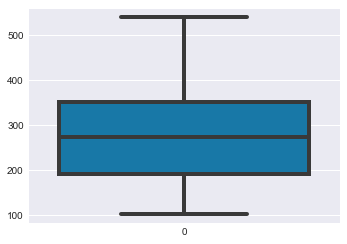

In [43]:
plt.figure(figsize=(5,4))
sns.boxplot(data=df.cement, palette='winter')

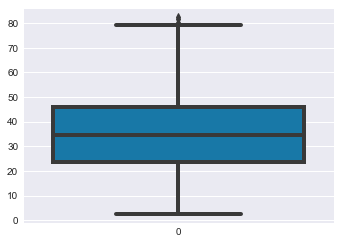

In [44]:
plt.figure(figsize=(5,4))
sns.boxplot(data=df.strength, palette='winter')

### d. Count Plot

Text(0.5, 1.0, 'age distribution in months')

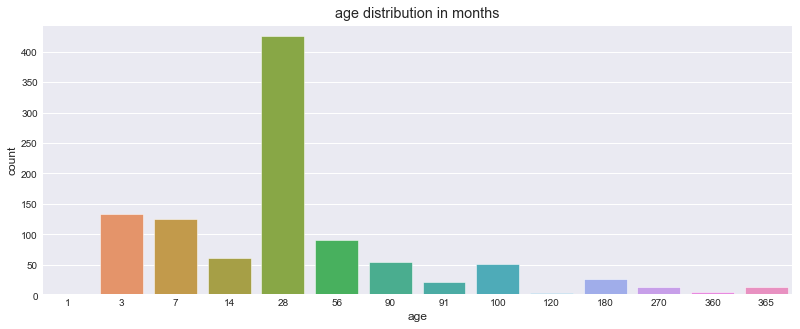

In [47]:
plt.figure(figsize=(12,5))
sns.countplot(x = 'age', data=df)
plt.title("age distribution in months")              

### 2. Bivariate Analysis

### a. Scatter Plot

Text(0.5, 1.0, 'cement Vs fineagg')

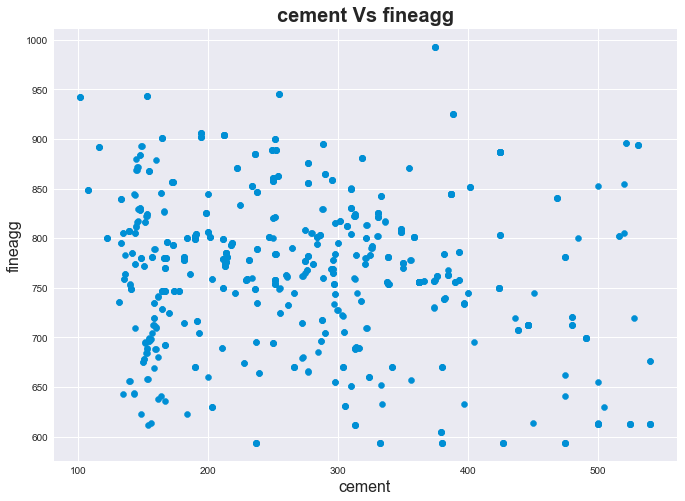

In [36]:
# Scatter plot between "cement" and "fineagg"
plt.figure(figsize=(10,8))
plt.scatter(df['cement'], df['fineagg'])

plt.xlabel('cement', fontsize = 16)
plt.ylabel('fineagg', fontsize = 16)

plt.title('cement Vs fineagg', fontsize = 20, fontweight = 'bold')

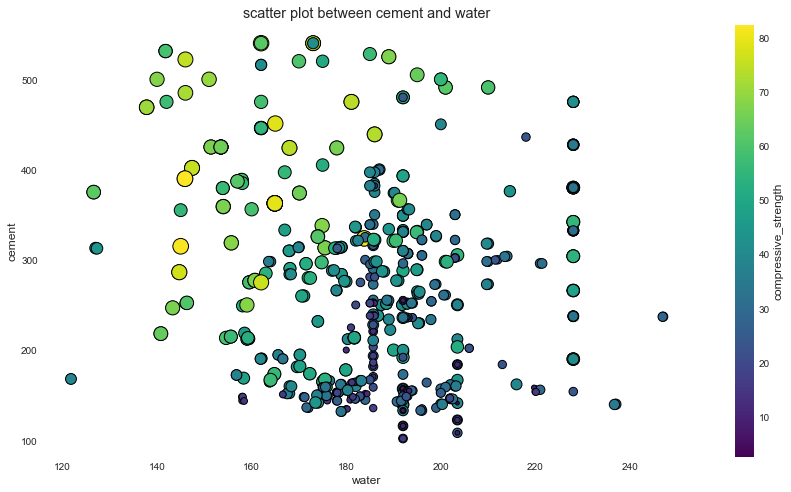

In [52]:
# Scatter plot between "cement" and "water"
fig = plt.figure(figsize=(13,8))
ax = fig.add_subplot(111)
plt.scatter(df["water"], df["cement"], c=df["strength"], s=df["strength"]*3,
            linewidth=1, edgecolor="k", cmap="viridis")
ax.set_facecolor("w")
ax.set_xlabel("water")
ax.set_ylabel("cement")
lab = plt.colorbar()
lab.set_label("compressive_strength")
plt.title("scatter plot between cement and water")
plt.grid(True,alpha=.3)
plt.show()

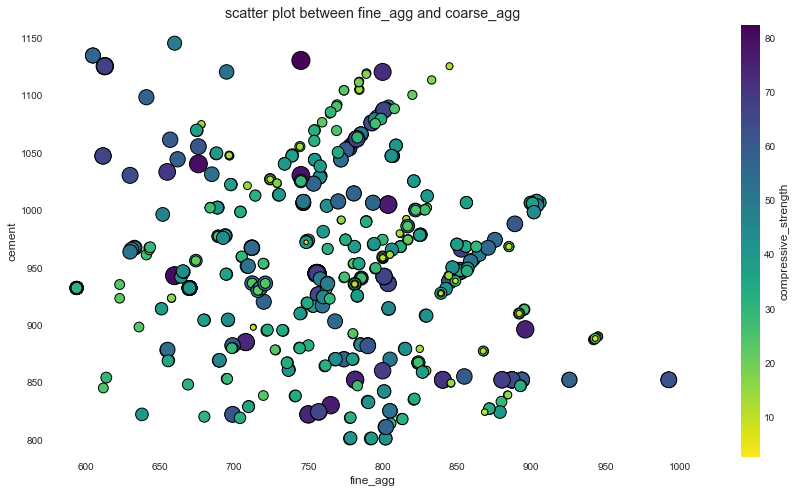

In [56]:
# Scatter plot between "cement" and "water"
fig = plt.figure(figsize=(13,8))
ax = fig.add_subplot(111)
plt.scatter(df["fineagg"], df["coarseagg"], c=df["strength"], s=df["strength"]*4,
            linewidth=1, edgecolor="k", cmap="viridis_r")
ax.set_facecolor("w")
ax.set_xlabel("fine_agg")
ax.set_ylabel("cement")
lab = plt.colorbar()
lab.set_label("compressive_strength")
plt.title("scatter plot between fine_agg and coarse_agg")
plt.grid(True,alpha=.3)
plt.show()

Text(0.5, 1.0, 'cement Vs ash')

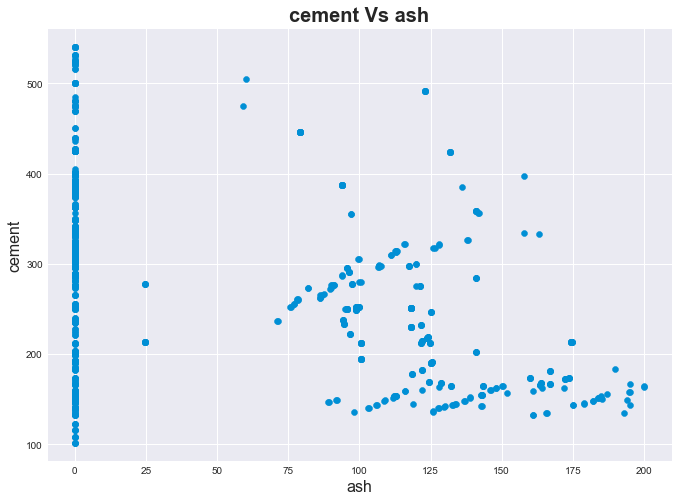

In [53]:
plt.figure(figsize=(10,8))
plt.scatter(df['ash'],df['cement'])

plt.xlabel('ash', fontsize=16)
plt.ylabel('cement', fontsize=16)

plt.title('cement Vs ash', fontsize = 20, fontweight = 'bold')

Text(0.5, 1.0, 'Age Vs Strength')

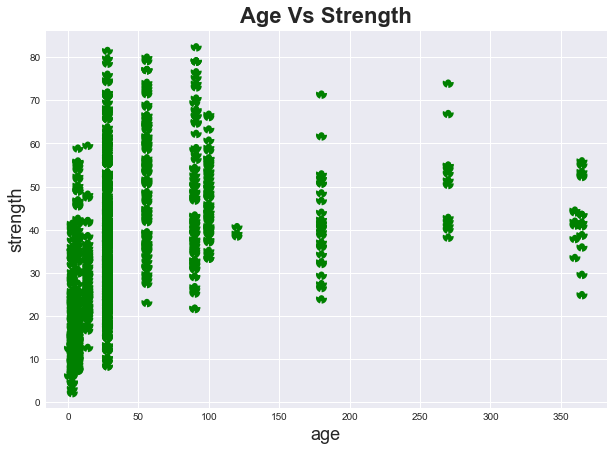

In [39]:
plt.figure(figsize=(9,7))
x = df['age']
y = df['strength']
plt.scatter(df['age'], df['strength'], color='green', linewidth=5, linestyle='dotted')

plt.xlabel('age', fontsize=18)
plt.ylabel('strength', fontsize=18)

plt.title('Age Vs Strength', fontsize=22, fontweight='bold')

- Observe that we have outliers in water, slag, age, strength, superplastic, fineagg

### b. Relational Plot

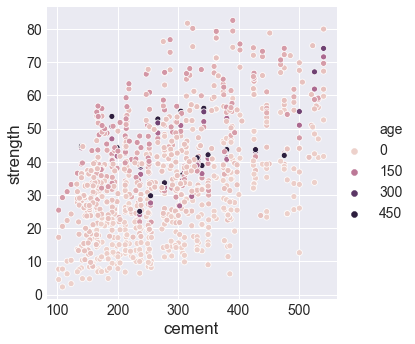

In [110]:
sns.relplot(x='cement', y='strength', data=df, hue="age")

### c. Strip Plot

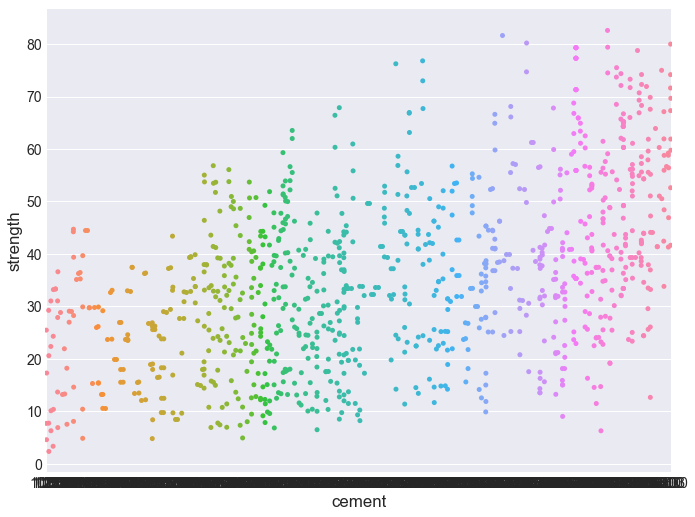

In [113]:
sns.stripplot(x='cement', y='strength', data=df)

### d. Voilin Plot

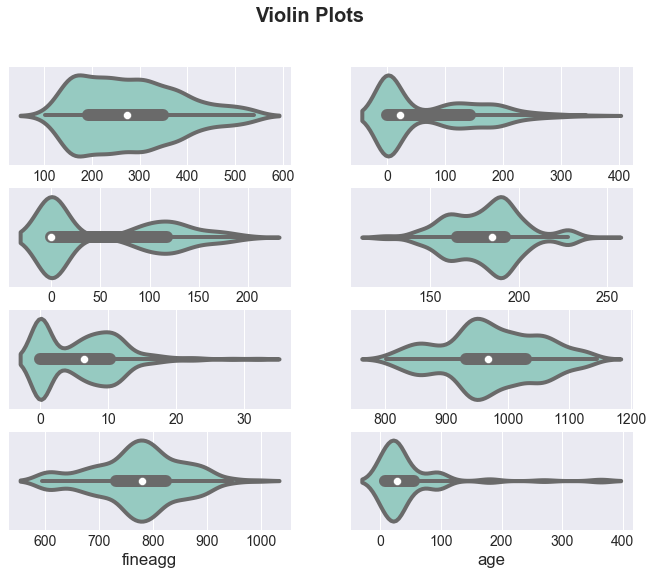

In [129]:
fig,ax = plt.subplots(nrows=4, ncols=2, figsize=(10,8))
plt.suptitle('Violin Plots', fontsize=20, fontweight = 'bold')
sns.violinplot(x="cement", data=df, ax=ax[0,0], palette='Set3')
sns.violinplot(x="slag", data=df, ax=ax[0,1], palette='Set3')
sns.violinplot (x='ash', data=df, ax=ax[1,0], palette='Set3')
sns.violinplot(x='water', data=df, ax=ax[1,1], palette='Set3')
sns.violinplot(x="superplastic", data=df, ax=ax[2,0], palette='Set3')
sns.violinplot(x="coarseagg", data=df, ax=ax[2,1], palette='Set3')
sns.violinplot (x ='fineagg', data=df, ax=ax[3,0], palette='Set3')
sns.violinplot(x='age', data=df, ax=ax[3,1], palette='Set3')
plt.show()

### e. Swarm Plot

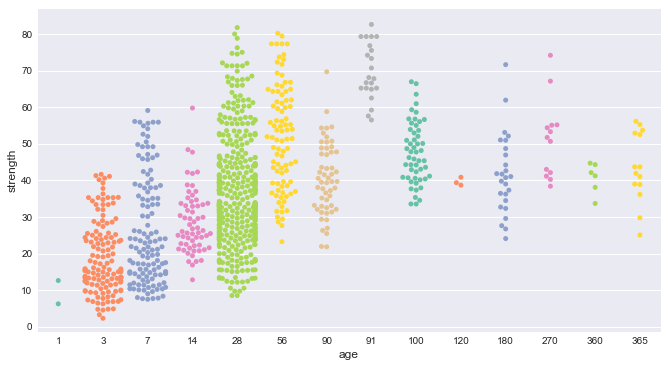

In [42]:
plt.figure(figsize=(10,6))
sns.swarmplot(x="age", y="strength", data=df, palette="Set2", dodge=True)

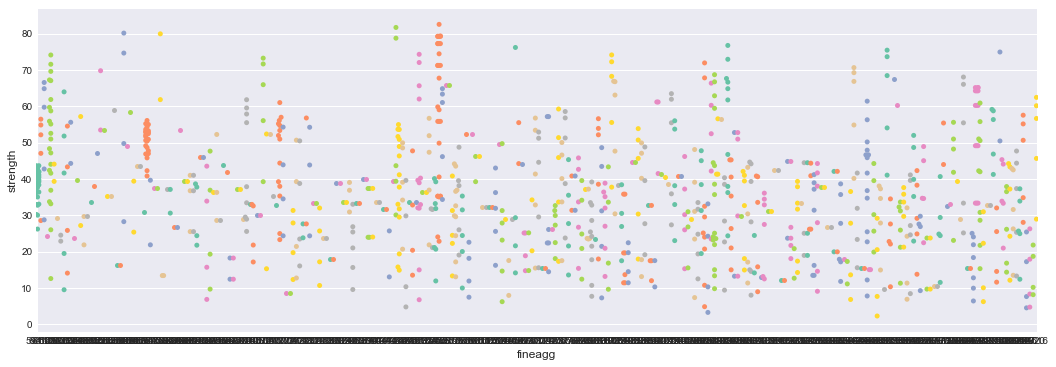

In [44]:
plt.figure(figsize=(16,6))
sns.swarmplot(x="fineagg", y="strength", data=df, palette="Set2", dodge=True)

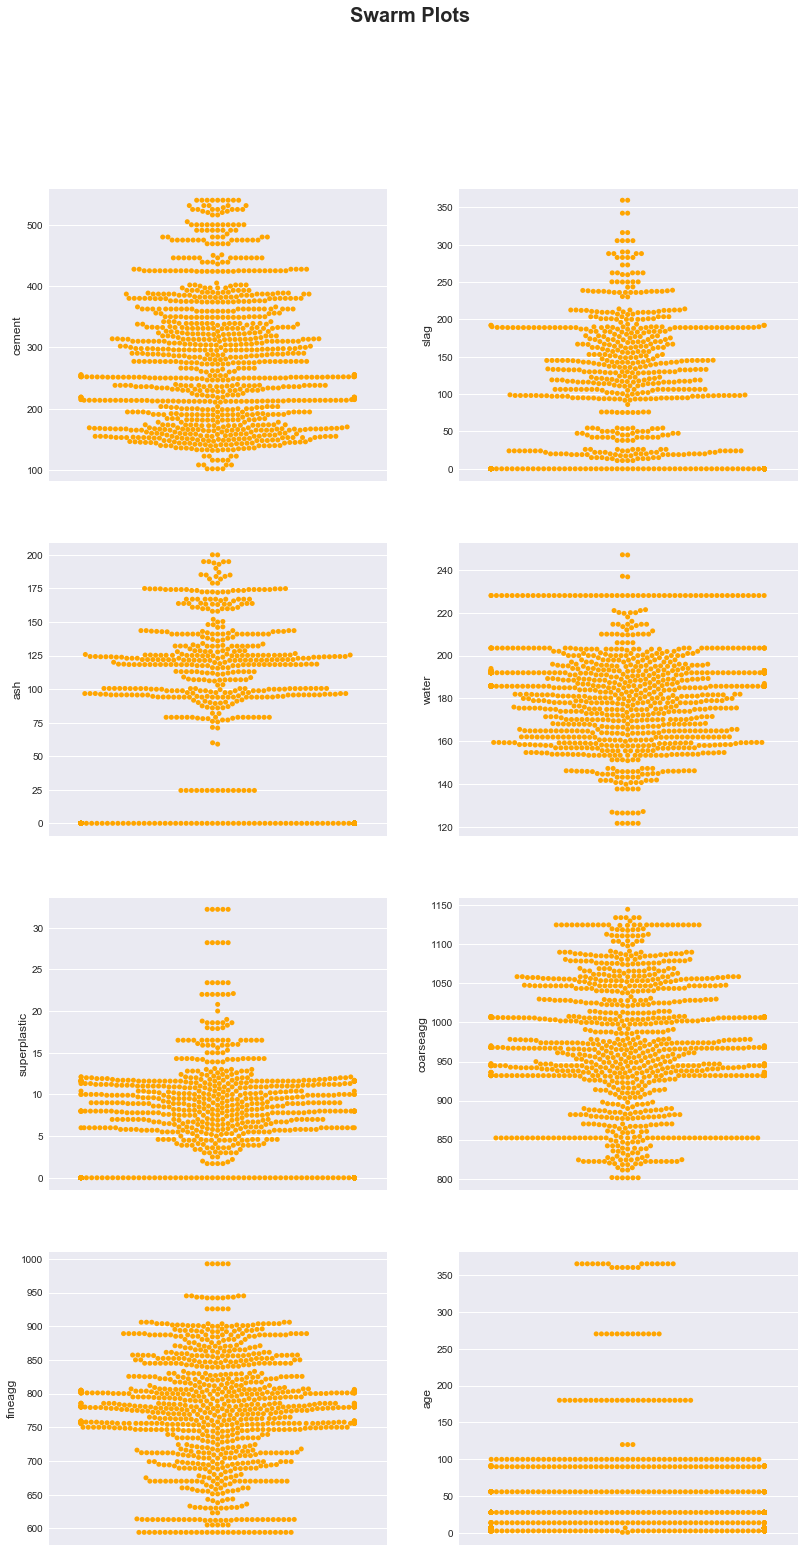

In [40]:
# Swarm plot for feature columns
fig,ax = plt.subplots(nrows=4, ncols=2, figsize=(12,25))
plt.suptitle('Swarm Plots', fontsize=20, fontweight = 'bold')
sns.swarmplot(y="cement", data=df, ax=ax[0,0], color="orange")
sns.swarmplot(y="slag", data=df, ax=ax[0,1], color="orange")
sns.swarmplot (y='ash', data=df, ax=ax[1,0], color="orange")
sns.swarmplot(y='water', data=df, ax=ax[1,1], color="orange")
sns.swarmplot(y="superplastic", data=df, ax=ax[2,0], color="orange")
sns.swarmplot(y="coarseagg", data=df, ax=ax[2,1], color="orange")
sns.swarmplot (y ='fineagg', data=df, ax=ax[3,0], color="orange")
sns.swarmplot(y='age', data=df, ax=ax[3,1], color="orange")
plt.show()

### f. Regression Plot

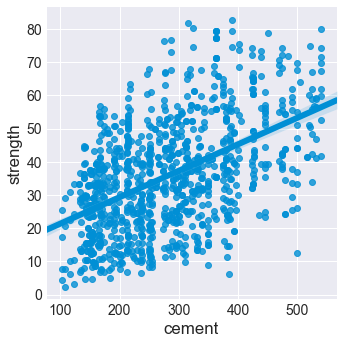

In [119]:
sns.lmplot(x='cement', y='strength', data=df)

### 3. Multivariate Analysis

- 1. Pair Plot

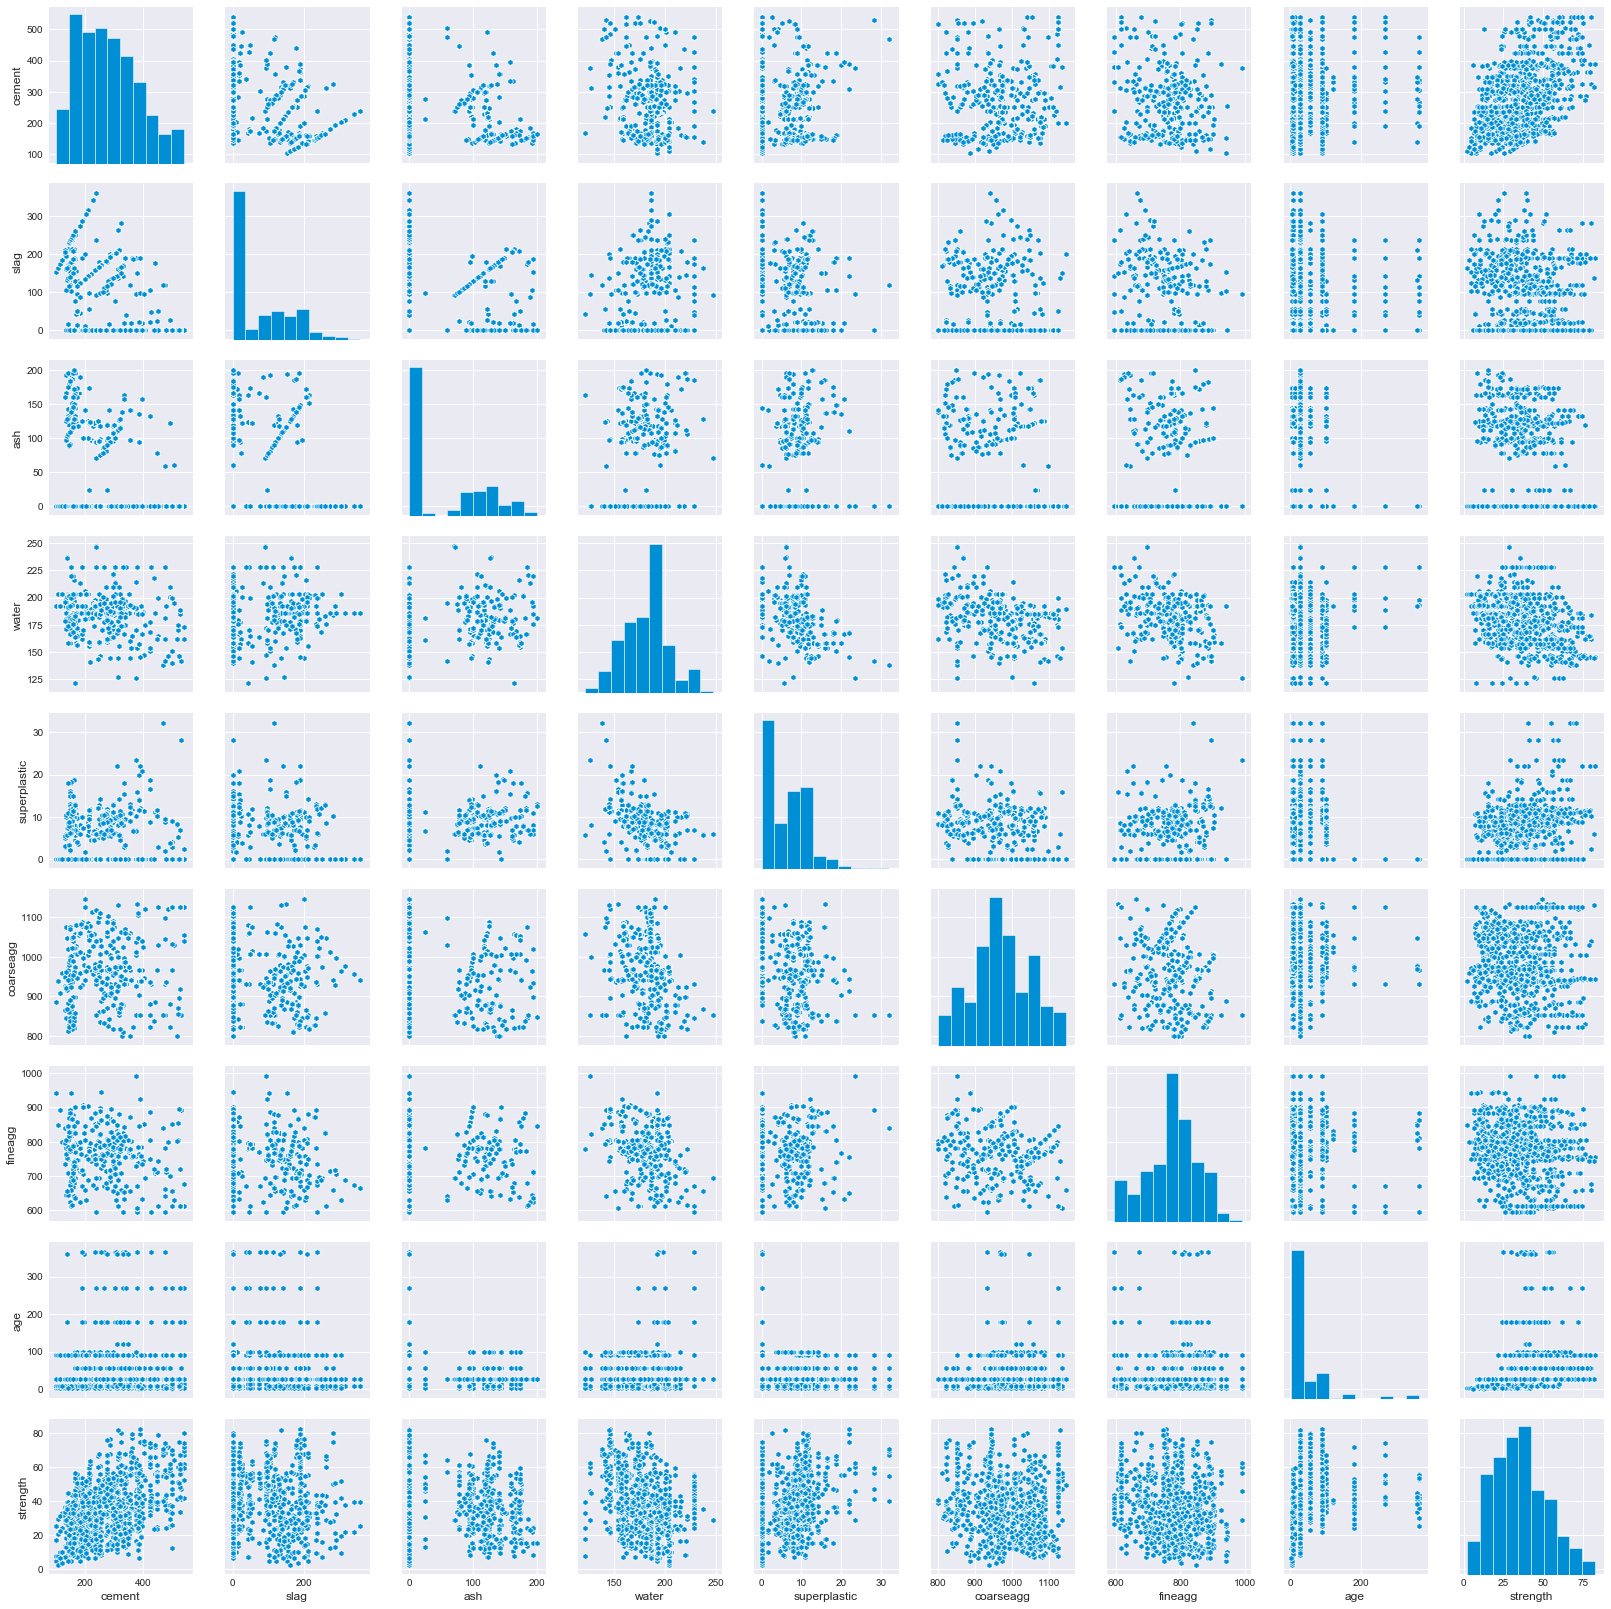

In [54]:
sns.pairplot(df,markers="h")
plt.show()

<h2 style="color:blue" align="left"> 6. Detect outliers using IQR </h2>

 1. Find out the samples which are beyond the (IQR*1.5 + Q3) values.
 2. Replace all such values with the Median.
 
- Note: Median is robust to the effect of Outlier.

In [45]:
df_IQR = df[["slag", "water", "superplastic","age", "strength"]]
Q1 = df_IQR.quantile(0.25)
Q3 = df_IQR.quantile(0.75)
IQR = Q3 - Q1
IQR

slag            142.950
water            27.100
superplastic     10.200
age              49.000
strength         22.425
dtype: float64

In [46]:
# Here are the outliers

df_IQR_clean = df_IQR[~((df_IQR < (Q1 - 1.5*IQR)) | (df_IQR > (Q3 + 1.5*IQR))).any(axis=1)]

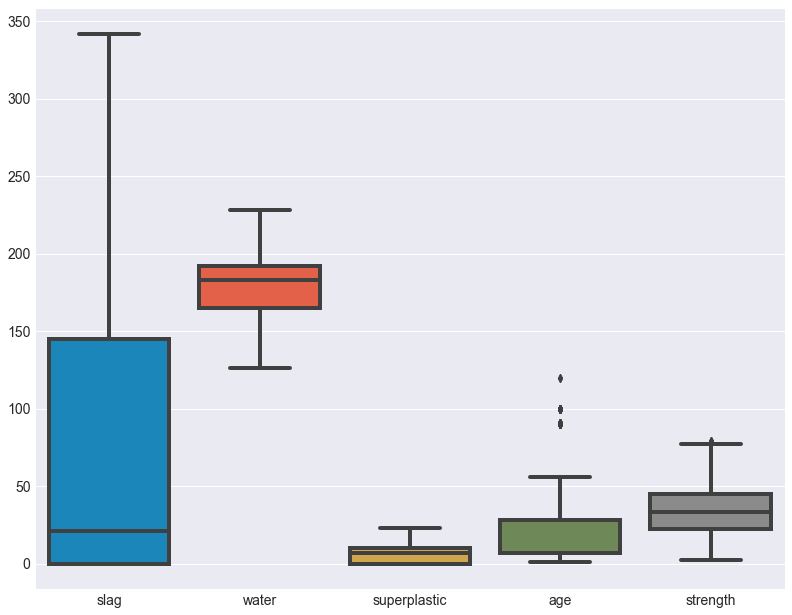

In [47]:
# boxplot() showing outlier
box = df_IQR_clean
plt.figure(figsize=(12,10))
sns.boxplot(data=box)
plt.show()

In [80]:
# Function to find the Upper Cut-off & Median Value for the Given Variable
from scipy.stats import iqr
def outlier_cap(df):
    IQR = iqr(df)
    Q3 = np.percentile(df,75)
    ucap = IQR*1.5 + Q3
    median = df[df<ucap].median()
    return ucap,median

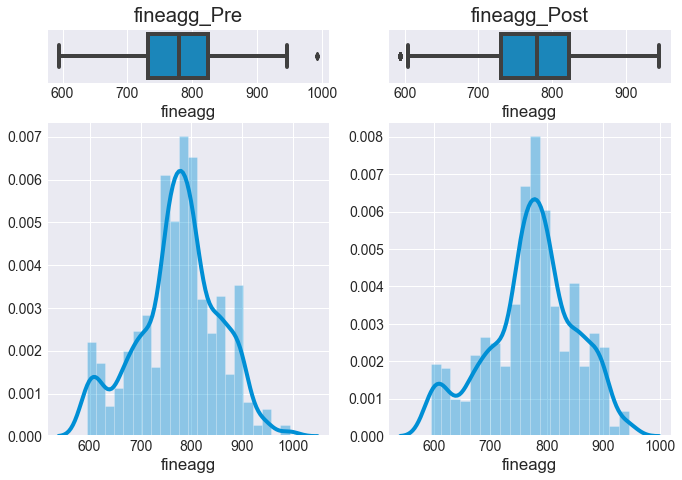

In [81]:
# Treating fineagg outlier
f,((ax_box,ax_box_post),(ax_hist,ax_hist_post)) = plt.subplots(2,2,gridspec_kw={'height_ratios':(0.15,0.85)},figsize=(10,7))
sns.boxplot(df['fineagg'], ax=ax_box).set_title("fineagg_Pre")
sns.distplot(df['fineagg'], ax=ax_hist)
ucap_fineagg, median_fineagg = outlier_cap(df['fineagg'])
df.loc[df['fineagg']>ucap_fineagg,'fineagg'] = median_fineagg
sns.boxplot(df['fineagg'], ax=ax_box_post).set_title("fineagg_Post")
sns.distplot(df['fineagg'], ax=ax_hist_post)

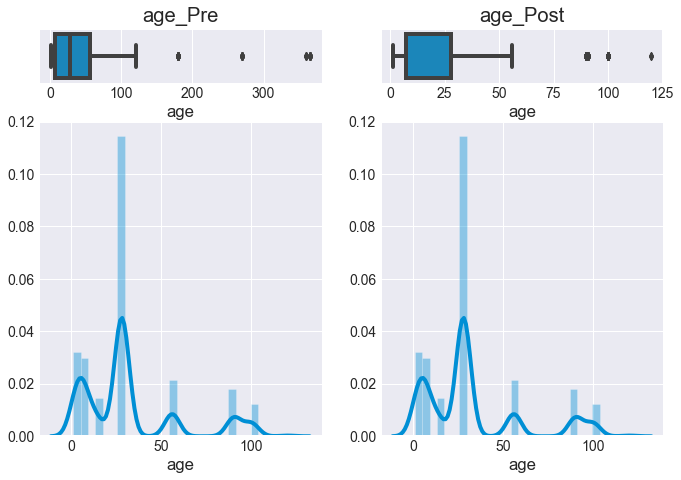

In [83]:
# Treating age outlier
f,((ax_box,ax_box_post),(ax_hist,ax_hist_post)) = plt.subplots(2,2,gridspec_kw={'height_ratios':(0.15,0.85)},figsize=(10,7))
sns.boxplot(df['age'], ax=ax_box).set_title("age_Pre")
sns.distplot(data['age'], ax=ax_hist)
ucap_age, median_age = outlier_cap(df['age'])
df.loc[df['age']>ucap_age,'age'] = median_age
sns.boxplot(df['age'], ax=ax_box_post).set_title("age_Post")
sns.distplot(df['age'], ax=ax_hist_post)

<h2 style="color:blue" align="left"> 7. Check & Reduce Skewness </h2>

  The thumb rule is:
  
  * If the **skewness** is **between -0.5 to +0.5** then we can say data is **fairly symmetrical**.
  
  
  * If the **skewness** is **between -1 to -0.5 or 0.5 to 1** then data is **moderately skewed**.
  
  
  * If the **skewness** is **less than -1 and greater than +1** then our data is **heavily skewed**.

### a. Checking Skewness for feature "cement"

In [45]:
# Checking the skewness of "cement" attributes
df['cement'].skew()

0.509481178871773

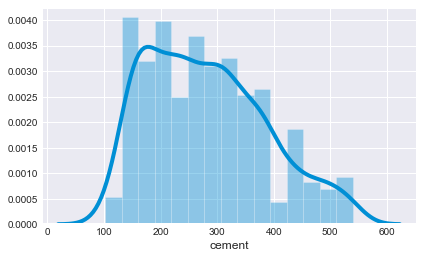

In [46]:
# plotting the histogram for "cement" attributes
sns.distplot(df['cement'], hist=True)

- feature **cement** is **right skewed.**

In [47]:
cube_root_cement = np.cbrt(df['cement'])
cube_root_cement

0       8.143253
1       8.143253
2       6.927830
3       6.927830
4       5.834358
          ...   
1025    6.513974
1026    6.855543
1027    5.295523
1028    5.418637
1029    6.389860
Name: cement, Length: 1030, dtype: float64

In [48]:
# calculation skewness after calculating the cube root 
cube_root_cement.skew()

0.08371630219956244

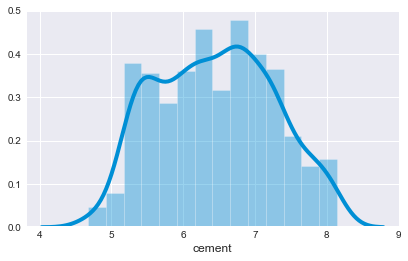

In [49]:
# visualising by density plot
sns.distplot(cube_root_cement, hist = True)

- The thumb rule is: If the skewness is between **-0.5 to +0.5** then we can say data is **fairly symmetrical.**

### b. Checking Skewness for feature "slag"

In [50]:
# Checking the skewness of "slag" attributes
df['slag'].skew()

0.8007168956061772

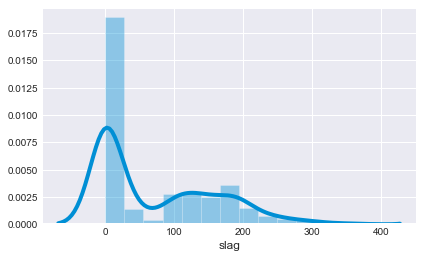

In [51]:
# plotting the histogram for "slag" attributes
sns.distplot(df['slag'], hist=True)

- feature **slag** is **right skewed.**

In [52]:
# calculating the cube root for the column data['slag'] column

cube_root_slag = np.cbrt(df['slag'])
cube_root_slag

0       0.000000
1       0.000000
2       5.223220
3       5.223220
4       5.096781
          ...   
1025    4.876999
1026    0.000000
1027    5.185066
1028    5.715419
1029    4.649312
Name: slag, Length: 1030, dtype: float64

In [53]:
cube_root_slag.skew()

0.07678343655461774

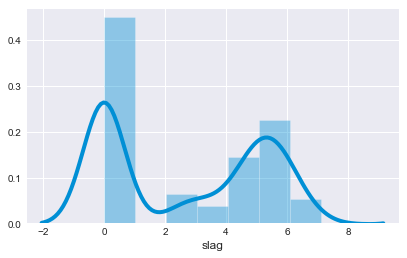

In [54]:
# visualising by density plot
sns.distplot(cube_root_slag, hist = True)

- The thumb rule is: If the skewness is between **-0.5 to +0.5** then we can say data is **fairly symmetrical.**

### c. Checking Skewness for feature "ash"

In [55]:
# Checking the skewness of "ash" attributes
df['ash'].skew()

0.5373539058066844

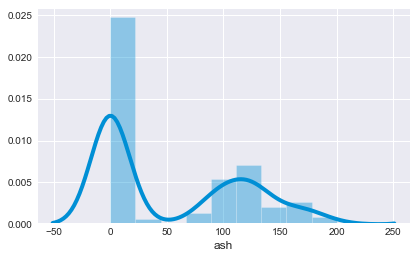

In [56]:
# plotting the histogram for "ash" attributes
sns.distplot(df['ash'], hist=True)

- feature **ash** is **right skewed.**

In [57]:
# performing the log transformation using numpy
cube_root_ash = np.cbrt(df['ash'])
cube_root_ash

0       0.000000
1       0.000000
2       0.000000
3       0.000000
4       0.000000
          ...   
1025    4.486379
1026    4.871387
1027    4.771006
1028    0.000000
1029    4.278129
Name: ash, Length: 1030, dtype: float64

In [58]:
cube_root_ash.skew()

0.25451356001938197

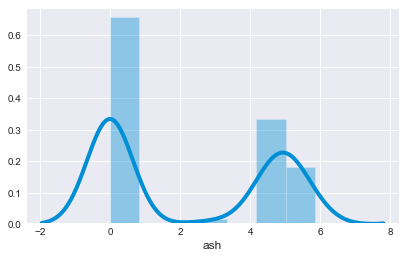

In [59]:
# visualising by density plot
sns.distplot(cube_root_ash, hist = True)

- The thumb rule is: If the skewness is between **-0.5 to +0.5** then we can say data is **fairly symmetrical.**

### d. Checking Skewness for feature "water"

In [60]:
# Checking the skewness of "water" attributes
df['water'].skew()

0.07462838428549402

- The thumb rule is: If the skewness is between **-0.5 to +0.5** then we can say data is **fairly symmetrical.**

### e. Checking Skewness for feature "superplastic"

In [61]:
# Checking the skewness of "superplastic" attributes
df['superplastic'].skew()

0.9072025748672465

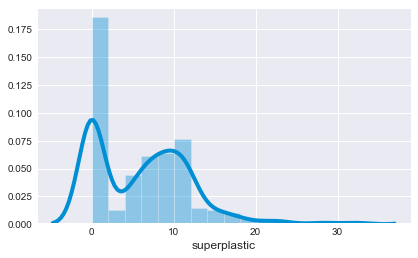

In [62]:
# plotting the histogram for "superplastic" attributes
sns.distplot(df['superplastic'], hist=True)

- feature **ash** is **right skewed.**

In [63]:
# performing the log transformation using numpy
sqrt_superplastic = np.sqrt(df['superplastic'])
sqrt_superplastic

0       1.581139
1       1.581139
2       0.000000
3       0.000000
4       0.000000
          ...   
1025    2.983287
1026    3.224903
1027    2.469818
1028    3.361547
1029    2.932576
Name: superplastic, Length: 1030, dtype: float64

In [64]:
sqrt_superplastic.skew()

-0.16084529846641735

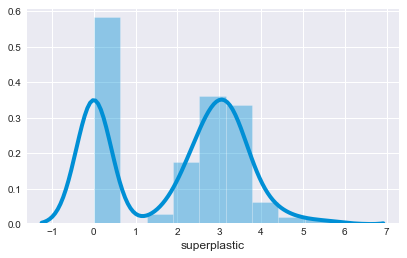

In [65]:
# visualising by density plot
sns.distplot(sqrt_superplastic, hist = True)

- The thumb rule is: If the skewness is between **-0.5 to +0.5** then we can say data is **fairly symmetrical.**

### f. Checking Skewness for feature "coarseagg"

In [66]:
# Checking the skewness of "coarseagg" attributes
df['coarseagg'].skew()

-0.04021974481106706

- feature **coarseagg** is **left skewed.**

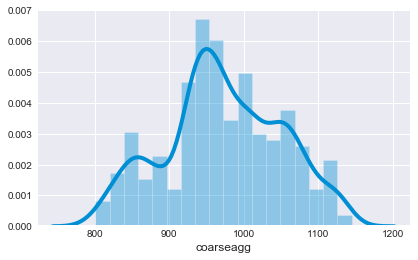

In [67]:
# plotting the histogram for "coarseagg" attributes
sns.distplot(df['coarseagg'], hist=True)

- The thumb rule is: If the skewness is between **-0.5 to +0.5** then we can say data is **fairly symmetrical.**

### g. Checking Skewness for feature "fineagg"

In [68]:
# Checking the skewness of "fineagg" attributes
df['fineagg'].skew()

-0.25300959769707576

- feature **fineagg** is **left skewed.**

In [69]:
# calculating the square for the column df['fineagg'] column
Square_fineagg = np.square(df['fineagg'])
Square_fineagg

0       456976.00
1       456976.00
2       352836.00
3       352836.00
4       681450.25
          ...    
1025    590284.89
1026    661619.56
1027    608400.00
1028    622363.21
1029    579882.25
Name: fineagg, Length: 1030, dtype: float64

In [70]:
Square_fineagg.skew()

0.03705920691410834

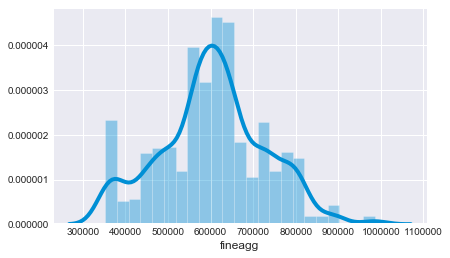

In [71]:
# plotting the density and histogram plot
sns.distplot(Square_fineagg, hist=True)

- The thumb rule is: If the skewness is between **-0.5 to +0.5** then we can say data is **fairly symmetrical.**

### h. Checking Skewness for feature "age"

In [72]:
# Checking the skewness of "age" attributes
df['age'].skew()

3.26917740063459

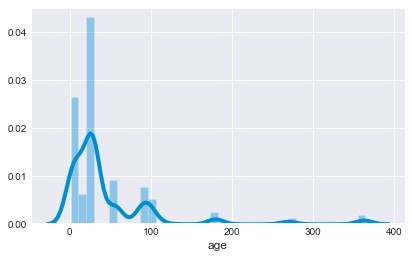

In [73]:
# plotting the histogram for "age" attributes
sns.distplot(df['age'], hist=True)

- feature **age** is **right skewed.**

In [74]:
# performing the log transformation using numpy
log_age = np.log(df['age'])
log_age

0       3.332205
1       3.332205
2       5.598422
3       5.899897
4       5.886104
          ...   
1025    3.332205
1026    3.332205
1027    3.332205
1028    3.332205
1029    3.332205
Name: age, Length: 1030, dtype: float64

In [75]:
log_age.skew()

-0.1513510704675477

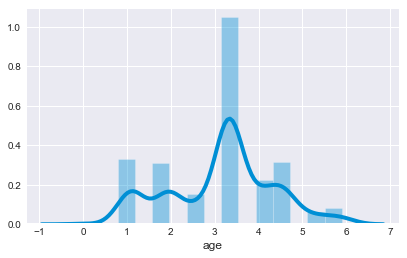

In [76]:
# plotting the density and histogram plot
sns.distplot(log_age, hist=True)

- The thumb rule is: If the skewness is between **-0.5 to +0.5** then we can say data is **fairly symmetrical.**

<h2 style="color:blue" align="left"> 7. Model building and Evaluation </h2>

In [84]:
# Independant variable
X = df.drop(['strength','cement','water'], axis=1)         # All rows & columns exclude Target features

# Dependant variable
y = df['strength']                                         # Only target feature

In [85]:
# split  data into training and testing sets of 70:30 ratio
# 20% of test size selected
# random_state is random seed
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=4)

In [86]:
# shape of X & Y test / train
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(824, 6) (206, 6) (824,) (206,)


### Scaling
- Standardizing the data i.e. to rescale the features to have a **mean of zero** and **standard deviation of 1.**

In [87]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

<h3 style="color:green" align="left"> a. Linear Regression </h3>

In [119]:
LinReg = LinearRegression()
LinReg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [122]:
# Lasso Regression
lasso = Lasso()
lasso.fit(X_train, y_train)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [123]:
# Ridge Regression
ridge = Ridge()
ridge.fit(X_train, y_train)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [124]:
y_pred_LinReg = LinReg.predict(X_test)
y_pred_lasso = lasso.predict(X_test)
y_pred_ridge = ridge.predict(X_test)

In [140]:
y_pred_train_LinReg = LinReg.predict(X_train)

In [136]:
print("Train Score {:.2f} & Test Score {:.2f}".format(LinReg.score(X_train, y_train), LinReg.score(X_test, y_test)))
print("Train Score {:.2f} & Test Score {:.2f}".format(lasso.score(X_train, y_train), lasso.score(X_test, y_test)))
print("Train Score {:.2f} & Test Score {:.2f}".format(ridge.score(X_train, y_train), ridge.score(X_test, y_test)))

Train Score 0.53 & Test Score 0.54
Train Score 0.53 & Test Score 0.53
Train Score 0.53 & Test Score 0.54


In [127]:
print("Model\t\t\t RMSE \t\t MSE \t\t MAE \t\t R2")

print("""LinearRegression \t {:.2f} \t\t {:.2f} \t{:.2f} \t\t{:.2f}""".format(
            np.sqrt(mean_squared_error(y_test, y_pred_LinReg)),
            mean_squared_error(y_test, y_pred_LinReg),
            mean_absolute_error(y_test, y_pred_LinReg),
            r2_score(y_test, y_pred_LinReg)))

print("""LassoRegression \t {:.2f} \t\t {:.2f} \t{:.2f} \t\t{:.2f}""".format(
            np.sqrt(mean_squared_error(y_test, y_pred_lasso)),
            mean_squared_error(y_test, y_pred_lasso),
            mean_absolute_error(y_test, y_pred_lasso),
            r2_score(y_test, y_pred_lasso)))

print("""RidgeRegression \t {:.2f} \t\t {:.2f} \t{:.2f} \t\t{:.2f}""".format(
            np.sqrt(mean_squared_error(y_test, y_pred_ridge)),
            mean_squared_error(y_test, y_pred_ridge),
            mean_absolute_error(y_test, y_pred_ridge),
            r2_score(y_test, y_pred_ridge)))

Model			 RMSE 		 MSE 		 MAE 		 R2
LinearRegression 	 11.85 		 140.53 	9.23 		0.54
LassoRegression 	 11.87 		 140.83 	9.25 		0.53
RidgeRegression 	 11.85 		 140.53 	9.23 		0.54


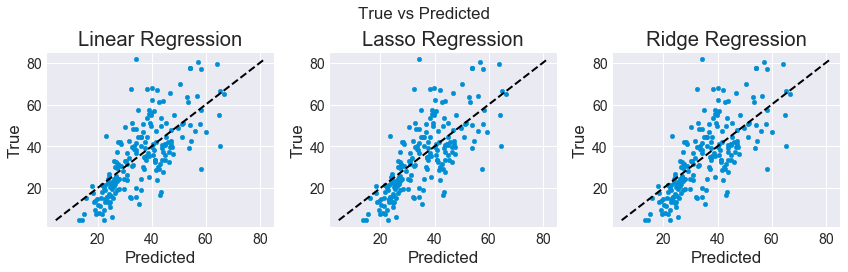

In [128]:
# Plotting Predictions
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(12,4))

ax1.scatter(y_pred_LinReg, y_test, s=20)
ax1.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
ax1.set_ylabel("True")
ax1.set_xlabel("Predicted")
ax1.set_title("Linear Regression")

ax2.scatter(y_pred_lasso, y_test, s=20)
ax2.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
ax2.set_ylabel("True")
ax2.set_xlabel("Predicted")
ax2.set_title("Lasso Regression")

ax3.scatter(y_pred_ridge, y_test, s=20)
ax3.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
ax3.set_ylabel("True")
ax3.set_xlabel("Predicted")
ax3.set_title("Ridge Regression")
fig.suptitle("True vs Predicted")
fig.tight_layout(rect=[0, 0.03, 1, 0.95])

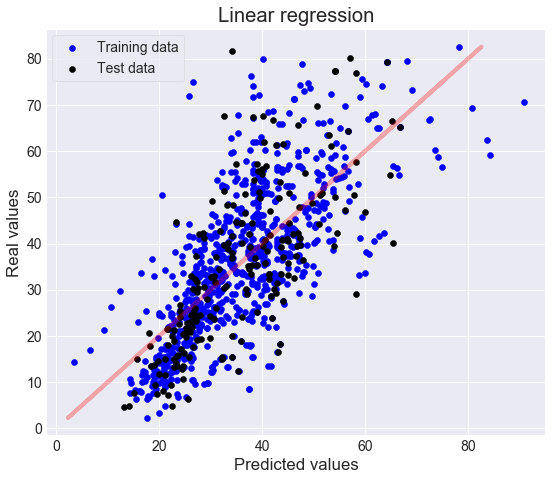

In [142]:
plt.figure(figsize=(8,7))
plt.scatter(y_pred_train_LinReg, y_train, c = "blue",  label = "Training data")
plt.scatter(y_pred_LinReg, y_test, c = "black",  label = "Test data")
plt.plot(y_train, y_train, alpha=0.3, c='r')

plt.xlabel("Predicted values")
plt.ylabel("Real values")

plt.title("Linear regression")

plt.legend(loc = "upper left")

plt.show()

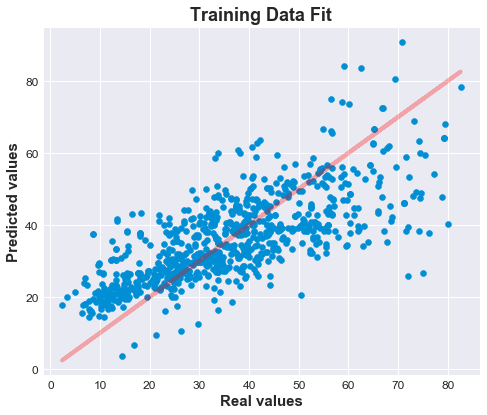

In [143]:
plt.figure(figsize=(7,6))
plt.scatter(y_train, y_pred_train_LinReg)
plt.plot(y_train, y_train, alpha=0.3, c='r')

plt.xlabel("Real values", fontsize=15, fontweight='bold')
plt.ylabel("Predicted values", fontsize=15, fontweight='bold')

plt.title("Training Data Fit", fontsize=18, fontweight='bold')

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.show()

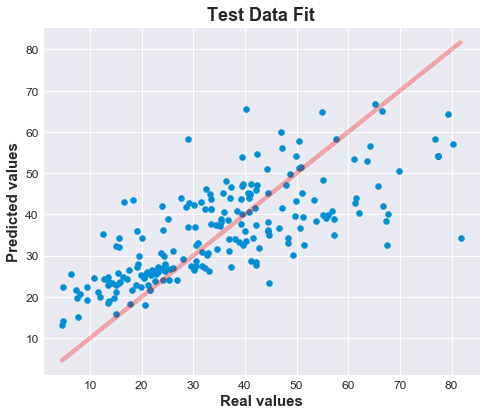

In [145]:
plt.figure(figsize=(7,6))
plt.scatter(y_test, y_pred_LinReg)
plt.plot(y_test, y_test, alpha=0.3, c='r')

plt.xlabel("Real values", fontsize=15, fontweight='bold')
plt.ylabel("Predicted values", fontsize=15, fontweight='bold')

plt.title("Test Data Fit", fontsize=18, fontweight='bold')

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.show()

<h3 style="color:green" align="left"> b. Decision Tree Regressor </h3>

In [92]:
DCT = DecisionTreeRegressor()
DCT.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [93]:
y_pred_DCT = DCT.predict(X_test)

In [94]:
print("Train Score {:.2f} & Test Score {:.2f}".format(DCT.score(X_train, y_train), DCT.score(X_test, y_test)))

Train Score 0.99 & Test Score 0.71


- As usual Decision Tree seems to have overfit.
- Let try to tune to hyperparameter.

Model				 RMSE 		 MSE 		 MAE 		 R2
Decision Tree Regressor 	 9.32 		 86.81 		5.67 		0.71


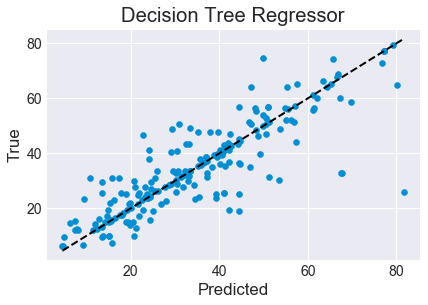

In [107]:
print("Model\t\t\t\t RMSE \t\t MSE \t\t MAE \t\t R2")
print("""Decision Tree Regressor \t {:.2f} \t\t {:.2f} \t\t{:.2f} \t\t{:.2f}""".format(
            np.sqrt(mean_squared_error(y_test, y_pred_DCT)),
            mean_squared_error(y_test, y_pred_DCT),
            mean_absolute_error(y_test, y_pred_DCT),
            r2_score(y_test, y_pred_DCT)))

plt.scatter(y_test, y_pred_DCT)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)

plt.xlabel("Predicted")
plt.ylabel("True")

plt.title("Decision Tree Regressor")

plt.show()

In [95]:
# Tuning Hyperparameter max_depth & min_sam_split of DecisionTreeRegressor
max_d = list(range(1,10))
min_sam_split = list(range(10,50,15))
gridcv = GridSearchCV(DCT, param_grid={'max_depth':max_d, 'min_samples_split':min_sam_split}, n_jobs=-1)
gridcv.fit(X_train, y_train)

GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best'),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9], 'min_samples_split': [10, 25, 40]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [96]:
print("Parameters :", gridcv.best_params_)
print("Train Score {:.2f} & Test Score {:.2f}".format(gridcv.score(X_train, y_train), gridcv.score(X_test, y_test)))

Parameters : {'max_depth': 9, 'min_samples_split': 25}
Train Score 0.78 & Test Score 0.72


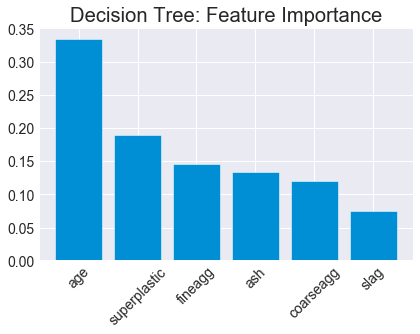

In [97]:
# Lets find out the feature importance based on DecisionTree Model
importances = DCT.feature_importances_
col = X.columns.tolist()
indices = importances.argsort()[::-1]
names = [col[i] for i in indices]

# Plotting Feature importance Chart
plt.title("Decision Tree: Feature Importance")
plt.bar(range(X.shape[1]),importances[indices])
plt.xticks(range(X.shape[1]),names,rotation=45);

<h3 style="color:green" align="left"> c. Random Forest Regressor </h3>

In [99]:
rfr = RandomForestRegressor()
rfr.fit(X_train, y_train)   # train the model

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [109]:
# predicting X_test
y_pred_rfr = rfr.predict(X_test)

In [110]:
print("Train Score {:.2f} & Test Score {:.2f}".format(rfr.score(X_train, y_train),rfr.score(X_test, y_test)))

Train Score 0.95 & Test Score 0.80


Model				 RMSE 		 MSE 		 MAE 		 R2
Random Forest Regressor 	 7.73 		 59.76 		5.40 		0.80


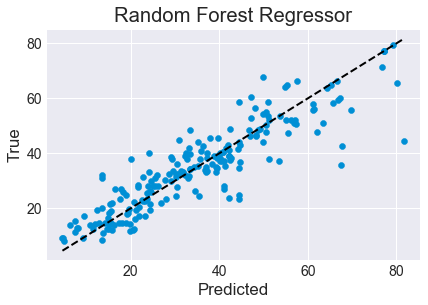

In [111]:
print("Model\t\t\t\t RMSE \t\t MSE \t\t MAE \t\t R2")
print("""Random Forest Regressor \t {:.2f} \t\t {:.2f} \t\t{:.2f} \t\t{:.2f}""".format(
            np.sqrt(mean_squared_error(y_test, y_pred_rfr)),
            mean_squared_error(y_test, y_pred_rfr),
            mean_absolute_error(y_test, y_pred_rfr),
            r2_score(y_test, y_pred_rfr)))

plt.scatter(y_test, y_pred_rfr)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)

plt.xlabel("Predicted")
plt.ylabel("True")

plt.title("Random Forest Regressor")

plt.show()

In [104]:
# Tuning Hyperparameter of Random Forest Regressor
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]

# Maximum number of levels in tree
max_depth = list(range(10,110,10))

# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]

gridcv_rfr = GridSearchCV(rfr, param_grid={'n_estimators':n_estimators,'max_depth':max_depth,
                                           'min_samples_split':min_samples_split,
                                           'min_samples_leaf':min_samples_leaf}, n_jobs=-1)
gridcv_rfr.fit(X_train, y_train)

KeyboardInterrupt: 

In [ ]:
print("Best Parameters:",gridcv_rfr.best_params_)
print("Train Score {:.2f} & Test Score {:.2f}".format(gridcv_rfr.score(X_train,y_train),gridcv_rfr.score(X_test,y_test)))

<h3 style="color:green" align="left"> d. XGBoost </h3> 

In [113]:
import xgboost
reg_xgb = xgboost.XGBRegressor()
reg_xgb.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
       importance_type='gain', interaction_constraints='',
       learning_rate=0.300000012, max_delta_step=0, max_depth=6,
       min_child_weight=1, missing=nan, monotone_constraints='()',
       n_estimators=100, n_jobs=0, num_parallel_tree=1,
       objective='reg:squarederror', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
       validate_parameters=1, verbosity=None)

In [114]:
print("Train Score {:.2f} & Test Score {:.2f}".format(reg_xgb.score(X_train,y_train),reg_xgb.score(X_test,y_test)))

Train Score 0.98 & Test Score 0.86


In [115]:
# predicting X_test
y_pred_xgb = rfr.predict(X_test)

### Score Summary :

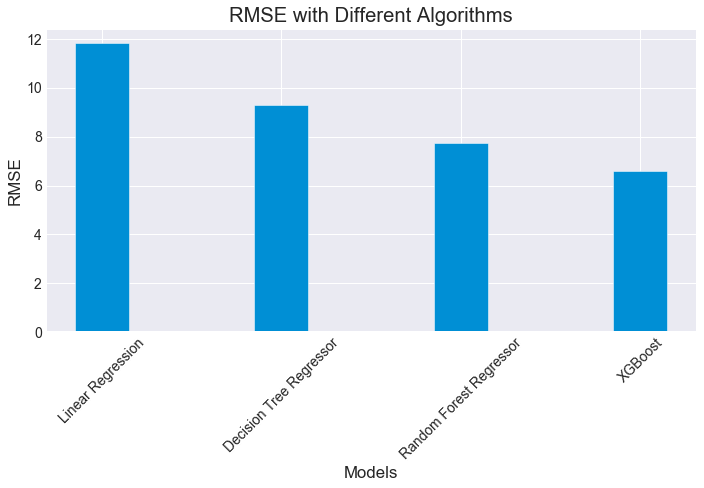

In [118]:
models = [LinReg, DCT, rfr, reg_xgb]
names = ["Linear Regression", "Decision Tree Regressor", "Random Forest Regressor", "XGBoost"]
rmses = []

for model in models:
    rmses.append(np.sqrt(mean_squared_error(y_test, model.predict(X_test))))

x = np.arange(len(names)) 
width = 0.3

fig, ax = plt.subplots(figsize=(10,7))
rects = ax.bar(x, rmses, width)
ax.set_ylabel('RMSE')
ax.set_xlabel('Models')

ax.set_title('RMSE with Different Algorithms')

ax.set_xticks(x)
ax.set_xticklabels(names, rotation=45)

fig.tight_layout()

#### Linear Model
- Accuracy on Test Data Set with Linear Regression : 54%
- Accuracy on Test Data Set with Lasso Regression : 54%
- Accuracy on Test Data Set with Ridge Regression : 54%

#### Tree Model
- Accuracy on Test Data Set with DecisionTree Regression : 71%

#### Ensemble Model
- Accuracy on Test Data Set with RandomForest Regression : 80%

#### XGBoost Model
- Accuracy on Test Data Set with XGBoost Regression : 86%


- So far XGBoostRegression proved to be the best performing model with 86% accuracy.

<h3 style="color:green" align="left"> Hypothesis Testing </h3>

In [2]:
from scipy import stats
from scipy.stats import f_oneway
from scipy.stats import ttest_ind

In [7]:
stats.ttest_1samp(df['age'],0)

Ttest_1sampResult(statistic=23.198748987350303, pvalue=4.2236491762836595e-96)

In [139]:
import statsmodels.api as sms
model = sms.OLS(y,X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               strength   R-squared:                       0.899
Model:                            OLS   Adj. R-squared:                  0.899
Method:                 Least Squares   F-statistic:                     1521.
Date:                Sun, 05 Jul 2020   Prob (F-statistic):               0.00
Time:                        00:48:28   Log-Likelihood:                -4067.2
No. Observations:                1030   AIC:                             8146.
Df Residuals:                    1024   BIC:                             8176.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
slag             0.0140      0.005      2.934      0.003       0.005       0.023
ash             -0.0737      0.007    -10.366      0.000      -0.088      -0.060
superplastic     1.4292      0.076     18.909      0.000       1.281       1.578
coarseagg        0.0341      0.003     11.249      0.000       0.028       0.040
fineagg         -0.0173      0.004     -4.435      0.000      -0.025      -0.010
age              0.3036      0.014     21.422      0.000       0.276       0.331
==============================================================================
Omnibus:                       59.937   Durbin-Watson:                   1.085
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               69.827
Skew:                           0.593   Prob(JB):                     6.88e-16
Kurtosis:                       3.470   Cond. No.                         241.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""